## Big Data, Final Project: Bank Churners

#### Warsaw School of Economics

By Jakub Kostrzębski

## 1. Introduction
This dataset consists of 10,000 bank customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are 20 features and no missing data.

The purpose of this project is to determine whether a customer of a bank will churn. The data has been sourced from kaggle ('https://www.kaggle.com/sakshigoyal7/credit-card-customers').

The features of this dataset are ordered as follows:
##### Categorical features
- Attrition_Flag (1: Existing Customer, 0: Attrited Customer): Target variable
- Gender (1: Male, 0: Female)
- Education_Level (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)
- Marital_Status (Married, Single, Unknown, Divorced)
- Income_Category (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar
- Card_Category (Blue, Silver, Gold, Platinum)

##### Numerical features

- Customer_Age: Customer's Age in Years
- Dependent_count: Number of dependents
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [0]:
# File location and type
file_location = "/FileStore/tables/BankChurners.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

# Removing 2 aggregation variables and individual numbers of clients from the dataframe.
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM')

pandasDF = df.toPandas()
display(pandasDF)

Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0
Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.76
Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.5,0.0
Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


## 2. Exploring the Data

### Categorical Features

In [0]:
c_list = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
c_order = [['Attrited Customer', 'Existing Customer'],
           ['F', 'M'],
           ['Unknown', 'Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate'],
           ['Unknown', 'Single', 'Married', 'Divorced'],
           ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
           ['Blue', 'Silver', 'Gold', 'Platinum']]

def pltCat(c_list, target):
    
    fig, axis = plt.subplots(2 ,3 , figsize=(30,10))  

    index = 0
    for i in range(2):
      for j in range(3):
        
        #hue is a grouping variable, ax is the position of the plot
        ax = sb.countplot(c_list[index], data=pandasDF, hue=target, ax=axis[i][j], order = c_order[index])
        
        #legend
        ax.legend(title='Attrition?',
                      loc='upper right',
                      labels=['No', 'Yes'])
  
        #label skew for visibility
        if c_list[index] in ['Education_Level', 'Income_Category']:
          for item in ax.get_xticklabels():
            item.set_rotation(15)
            
        for a in ax.patches:
          height = a.get_height()
          ax.text(a.get_x()+a.get_width()/2,
                  height + 25,
                  '{0}%'.format(round(height/len(pandasDF)*100,2)),
                  ha="center") 

        index += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

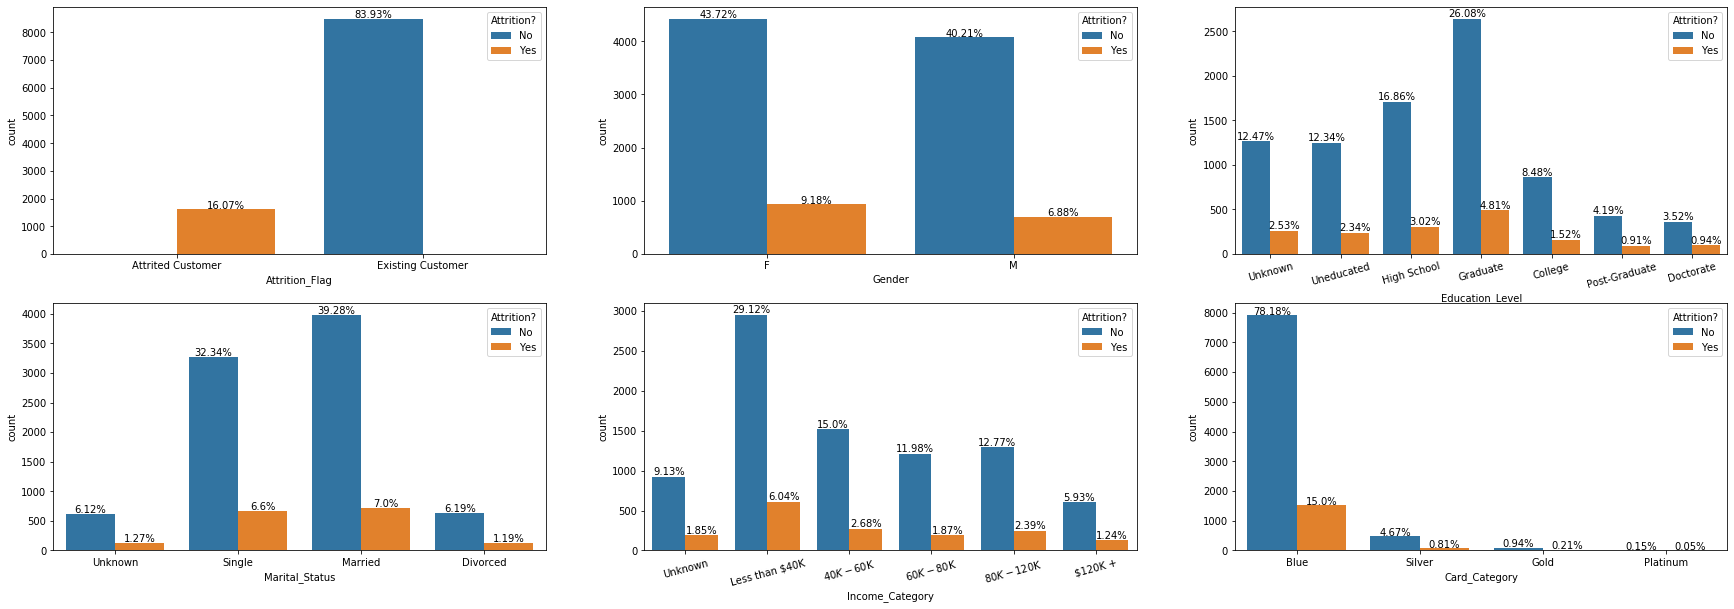

In [0]:
pltCat(c_list, 'Attrition_Flag')

####Observations
- We can see that the dataset is not equally distributed according to Attrition_Flag. Most observations in all categorical variables are of no attrition.
- With higher education and income comes decreased credid card usage.
- Overwhelmingly common card type is blue.
- Only ~16% of cases are that of attrited customers.

### Numerical Features

In [0]:
chosen_var = ['Customer_Age','Credit_Limit','Total_Trans_Ct','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Revolving_Bal']


def plotDist(var):
  
    fig, ax = plt.subplots(2, 3,figsize=(30, 10))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sb.distplot(pandasDF.loc[:, var[index]],
                         hist=True,
                         kde=True,
                         color='red',
                         ax=ax[i][j])
            ax[i][j].set_title(var[index])
            index += 1

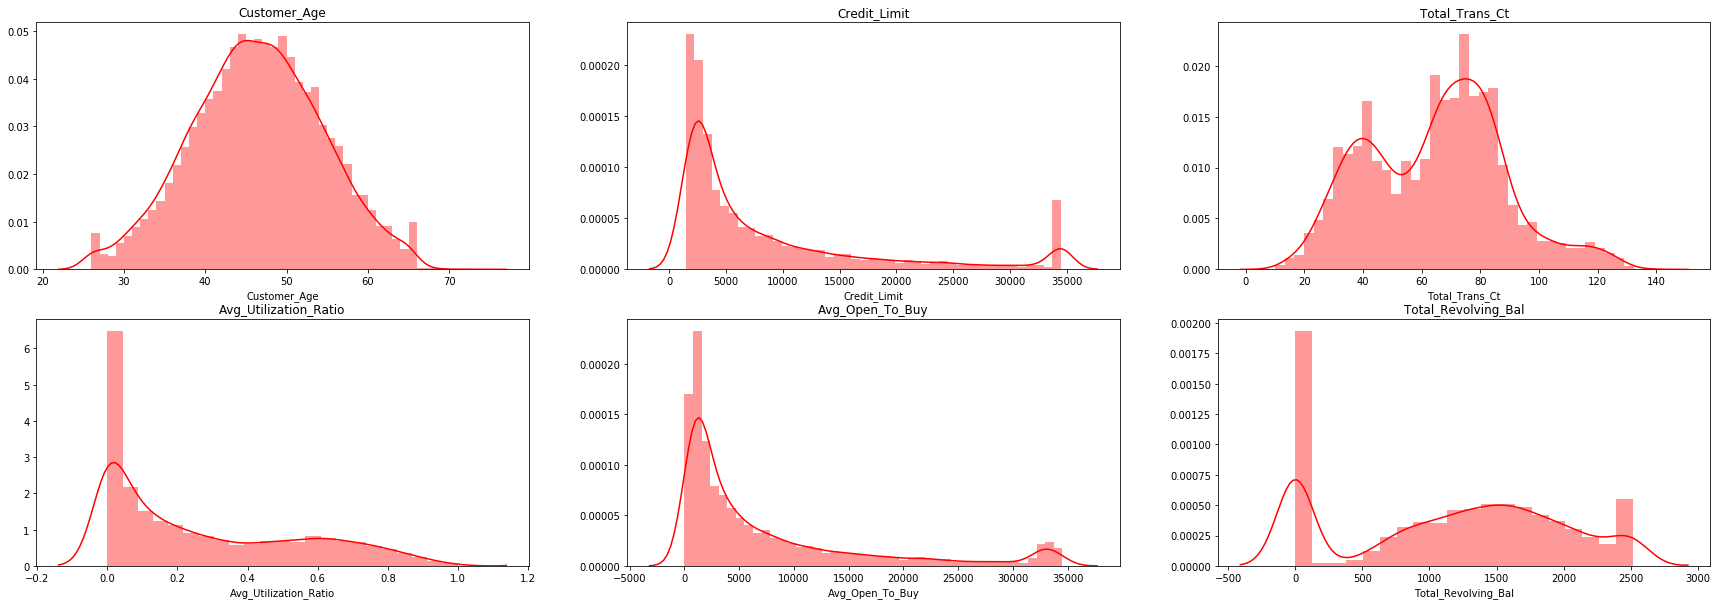

In [0]:
plotDist(chosen_var)

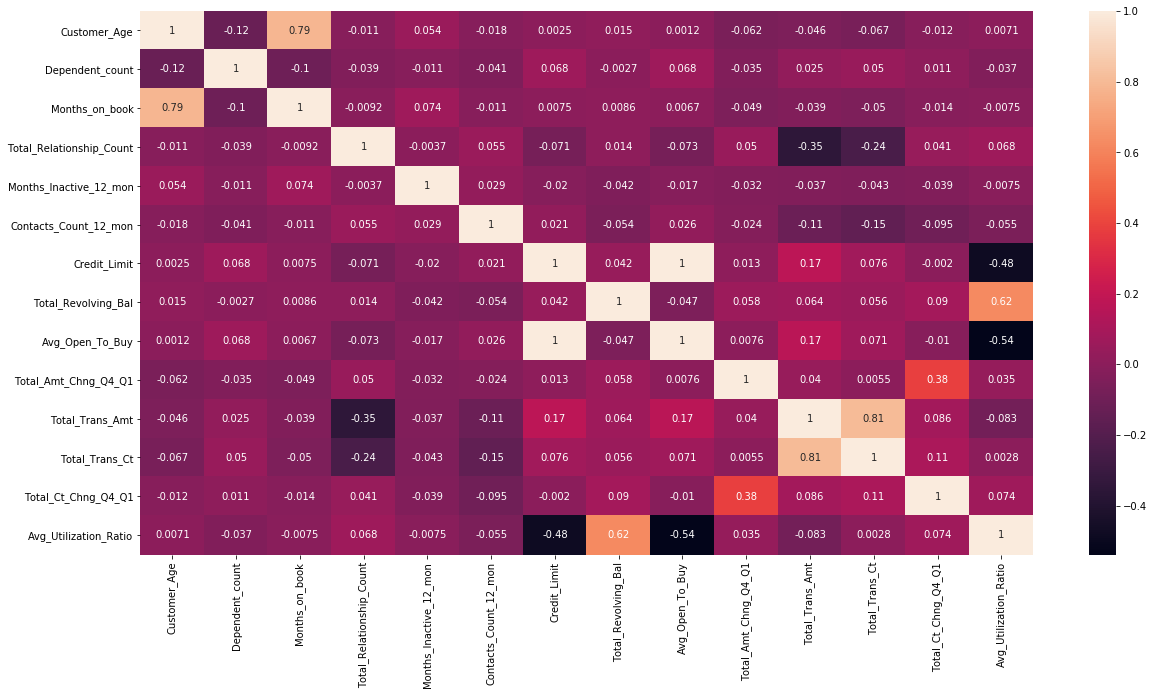

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(pandasDF.corr(), annot=True)
plt.show()

####Observations
- From the list of chosen features we can see that while some seem to have normal distibutions, others are skewed or have a binomial distribution.
- As we can see, most features are barely correlated with each other. Some of them, however, are highly correlated.

## 3. Modeling and analysis

- I have decided to use Logistic Regression and Random Forest as my ML algorithms of choice.
- For the purpose of the algorithms all categorical variables get recoded into binary dummy variables.
- Then, I will split the dataset into 2 sets: training(75%) and test(25%) which will be used to train and test the model, respectively.
- As there is only ~16% of observations representing attrited customers I will resample the training data using SMOTE so that it will even out with leftover customers.

In [0]:
# recoding categorical variables

pandasDF['Attrition_Flag']=pandasDF.Attrition_Flag.astype(object)
pandasDF.Attrition_Flag = pandasDF.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
pandasDF.Gender = pandasDF.Gender.replace({'F':1,'M':0})
pandasDF = pd.concat([pandasDF,pd.get_dummies(pandasDF['Education_Level']).drop(columns=['Unknown'])],axis=1)
pandasDF = pd.concat([pandasDF,pd.get_dummies(pandasDF['Income_Category']).drop(columns=['Unknown'])],axis=1)
pandasDF = pd.concat([pandasDF,pd.get_dummies(pandasDF['Marital_Status']).drop(columns=['Unknown'])],axis=1)
pandasDF = pd.concat([pandasDF,pd.get_dummies(pandasDF['Card_Category']).drop(columns=['Platinum'])],axis=1)
pandasDF.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)

display(pandasDF)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:300: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field College. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion from Arrow: uint8
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
0,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
0,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
0,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.76,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
0,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.5,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
0,44,0,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
0,51,0,4,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
0,32,0,0,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
0,37,0,3,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
0,48,0,2,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [0]:
# splitting the data set

df_training, df_test = train_test_split(pandasDF, test_size=0.25)

print(df_training.shape, df_test.shape)

(7595, 33) (2532, 33)

In [0]:
# upsampling the training dataset

x, y = SMOTE().fit_resample(df_training[df_training.columns[1:]], df_training[df_training.columns[0]])
df_trainingSa = X.assign(Attrition_Flag = y)

print(df_trainingSa.shape)

(12784, 33)

In [0]:
# Upsampling

df_trainingSa['Attrition_Flag'].value_counts()

Out[65]: 1 6392
0 6392
Name: Attrition_Flag, dtype: int64

In [0]:
# Creating X, X2 and Y, Y2  data sets from training and test for modeling purposes as the independent and dependent (Attrition) variables respectively.

X = df_trainingSa.loc[:, 'Customer_Age' : 'Silver']
Y = df_trainingSa['Attrition_Flag']

X2 = df_test.loc[:, 'Customer_Age' : 'Silver']
Y2 = df_test['Attrition_Flag']

### Logistic Regression
Since the dependent variable is binary we can simply use logistic regression to model it.

- 86.14% accuracy
- 88.90% cross validation accuracy

In [0]:
model = LogisticRegression(max_iter=10000)
model.fit(X, Y)

print('Logistic Regression:')
print('Model accuracy: {:.2%}'.format(model.score(X2,Y2)))
print('(cross_val) Model accuracy: {:.2%}'.format(cross_val_score(model, X2, Y2).mean()))

Logistic Regression:
Model accuracy: 86.14%
(cross_val) Model accuracy: 88.90%

### Random Forest
- 95.81% accuracy
- 93.84% cross validation accuracy

In [0]:
model = RandomForestClassifier()
model.fit(X, Y)
    
print('Logistic Regression:')
print('Model accuracy: {:.2%}'.format(model.score(X2,Y2)))
print('(cross_val) Model accuracy: {:.2%}'.format(cross_val_score(model, X2, Y2).mean()))

Logistic Regression:
Model accuracy: 95.81%
(cross_val) Model accuracy: 93.84%

## 4. Conclusions

After having cleaned and prepared the data set and a minimal analysis of the included variables' features I was able to run ML algorithms on it to predict the attrition of customers at almost 96% of success.

##### Sources:
- https://www.kaggle.com/sakshigoyal7/credit-card-customers
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://seaborn.pydata.org/
- https://matplotlib.org/
- https://stackoverflow.com/